# Create an Information System for a selected domain of interest.

You may use any back-end, including a DB developed in another module.
You may use any front-end, including CLI, GUI, web and API.
Describe the requirements of the information system, including users, data requirements, search, sorting, entry, update, validation, integrity, reporting etc.
Implement and test the Information System, and document your implementation thoroughly.
You must use public git (e.g. GitHub) to manage your source and versioning, with regular frequent commits.
You must attribute all code not written from scratch, either in accordance with its licence, if applicable, or if not, #taken from ...
You may use any programming language, however example programs will be presented in Python.
Groups must not exceed three members.
There will be a presentation in January, with the Moderator present, in order to assist in grading the work
Technical questions may be asked of any member of the group, and the assignment is individually marked. The contribution reports and GitHub record may be used to direct questions and to allocate marks.
All groups must submit a group report, containing individual contribution reports and a link to GitHub
All individuals must submit a reflective report on their experience of the group, assignment, and module

https://github.com/sabithamaram/PIS_B9IS123_CA2


Welcome to School Data Analysis Tracker!

Pick a choice to process data in the way required:
1) Claculate the class average
2) Subject-wise marks
3) Student-wise marks
4) Plot graph of class growth
4
Pick the growth type:
1) Student Growth
2) Class Growth
1

The directory path you selected is:
/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data

The available files are:
 ['2_2014.csv', '2_2015.csv', '2_2016.csv', '.DS_Store', 'Source Folder', '1_2016.csv', '1_2014.csv', '1_2015.csv']

Choose a grade
1

Enter name of student
arifa


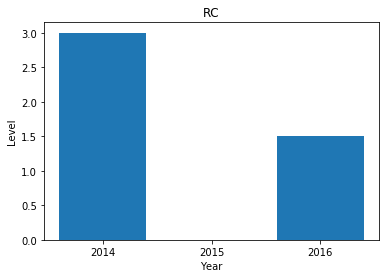

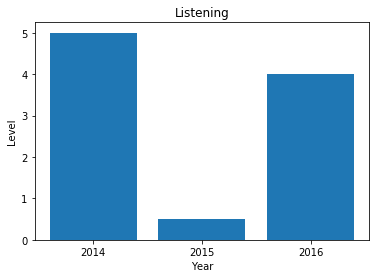

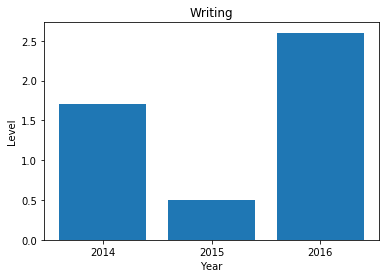

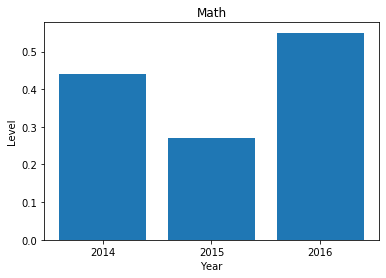

In [3]:
# Importing required libraries
import pandas as pd
from tabulate import tabulate as tb
import matplotlib.pyplot as plt
import numpy as np
import os
import tkinter
from tkinter import filedialog

# Creating a class to read the external CSV data files
class LoadData:
    def __init__(self, choice):
        self.choice = choice
    
    def file_select(self):            
        root = tkinter.Tk()
        dir_name = filedialog.askdirectory(parent=root, initialdir="/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data", title='Please select a directory')
        root.quit() # Reference link - https://stackoverflow.com/questions/28590669/tkinter-tkfiledialog-doesnt-exist/28590707
        print(f'\nThe directory path you selected is:\n{dir_name}')
        
        files_list = os.listdir(dir_name) # Reference link - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
        print(f'\nThe available files are:\n {files_list}')
        
        if self.choice == 1 or self.choice == 2 or self.choice == 3:
            file_name = input('\nSelect a file from above:\n')
            
            return pd.read_csv(dir_name + '/' + file_name + '.csv')
        
        else:
            grade_choice = int(input('\nChoose a grade\n'))
            if grade_choice == 1:
                first_data_file = pd.read_csv(dir_name + '/' + files_list[5])
                sec_data_file = pd.read_csv(dir_name + '/' + files_list[6])
                third_data_file = pd.read_csv(dir_name + '/' + files_list[7])
                
                return (first_data_file, sec_data_file, third_data_file)
            
            elif grade_choice == 2:
                first_data_file = pd.read_csv(dir_name + '/' + files_list[0])
                sec_data_file = pd.read_csv(dir_name + '/' + files_list[1])
                third_data_file = pd.read_csv(dir_name + '/' + files_list[2])
                
                return (first_data_file, sec_data_file, third_data_file)
            
            else:
                print('Grade data does not exist!')
             

        
# Creating a class to calculate subject-wise averages
class Avg:
    
    def __init__(self, avg_data):
        self.avg_data = avg_data
    
    def rc(self):
        rc_data = []
        # Creating a for loop to iterate over all values of 'RC' row and appending them to a list 'rc_data'
        for index, row in self.avg_data.iterrows(): # Reference link - https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
            reading_row_rc = row['RC']
            rc_data.append(reading_row_rc)
        # Claculating the average
        return sum(rc_data)/len(rc_data)
    
    def listening(self):
        lis_data = []
        # Creating a for loop to iterate over all values of 'Listening' row and appending them to a list 'lis_data'
        for index, row in self.avg_data.iterrows():
            reading_row_lis = row['Listening']
            lis_data.append(reading_row_lis)
        # Claculating the average
        return sum(lis_data)/len(lis_data)
    
    def writing(self):
        wri_data = []
        # Creating a for loop to iterate over all values of 'Writing' row and appending them to a list 'wri_data'
        for index, row in self.avg_data.iterrows():
            reading_row_wri = row['Writing']
            wri_data.append(reading_row_wri)
        # Claculating the average
        return sum(wri_data)/len(wri_data)
    
    def math(self):
        math_data = []
        # Creating a for loop to iterate over all values of 'Math' row and appending them to a list 'math_data'
        for index, row in self.avg_data.iterrows():
            reading_row_math = row['Math']
            math_data.append(reading_row_math)
        # Claculating the average
        return (sum(math_data)/len(math_data)) * 100
    
    
    
# Creating a class to tabulate subject-wise marks of a class during a particular year
class SubjectMarks:
    
    def __init__(self, sub_data):
        self.sub_data = sub_data
    
    # Creating a method to collect 'RC' data of all students from the DataFrame    
    def rc(self):
        data_df = self.sub_data[['Order', 'Name', 'RC']]
        return tb(data_df, headers=["Roll Order", "Name", "RC"], tablefmt='grid', showindex='never') #Reference link - https://pypi.org/project/tabulate/

    # Creating a method to collect 'Listening' data of all students from the DataFrame    
    def listening(self):
        data_df = self.sub_data[['Order', 'Name', 'Listening']]
        return tb(data_df, headers=["Roll Order", "Name", "Listening"], tablefmt='grid', showindex='never')
    
    # Creating a method to collect 'Writing' data of all students from the DataFrame    
    def writing(self):
        data_df = self.sub_data[['Order', 'Name', 'Writing']]
        return tb(data_df, headers=["Roll Order", "Name", "Writing"], tablefmt='grid', showindex='never')
     
    # Creating a method to collect 'Math' data of all students from the DataFrame    
    def math(self):
        data_df = self.sub_data[['Order', 'Name', 'Math']]
        return tb(data_df, headers=["Roll Order", "Name", "Math"], tablefmt='grid', showindex='never')
    
    

# Creating a class to tabulate student marks individually
class StudentMarks:
    
    def __init__(self, stu_data, stu_name):
        self.stu_data = stu_data
        self.stu_name = stu_name
    
    # Creating a method to search for a student name in the DataFrame and tabulate his/her details    
    def marks(self, class_call=None):
        self.class_call = class_call
        
        data_df = pd.DataFrame(self.stu_data, columns = ['Order', 'Name', 'RC', 'Listening', 'Writing', 'Math'])
        data_df = data_df[data_df['Name'].str.contains(self.stu_name)] # Reference link - https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

        if data_df.empty == True: # Reference link - https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.empty.html
            return 'No student found!'
        
        # Checking to see if data is requested from another class or for tabulating and displaying the DataFrame
        elif class_call == None:
            return tb(data_df, headers=["Roll Order", "Name", "RC", "Listening", "Writing", "Math"], tablefmt='grid', showindex='never')
        
        # If data requested from another class then DataFrame is sent directly without tabulating it
        else:
            return data_df


# Creating a class to display the data in the form of graphs
class GraphPlot:
    
    def __init__(self, graph_data_1, graph_data_2, graph_data_3):
        self.graph_data_1 = graph_data_1
        self.graph_data_2 = graph_data_2
        self.graph_data_3 = graph_data_3
        
    # Creating a method to collect the average RC values of a class over all the years
    def class_plot_rc(self):
        # Calling the 'Avg' class within this class and sending data
        class_call = Avg(self.graph_data_1)
        
        # Calling a method of a dirrerent class within this class to calculate the average levels of sent data
        rc_1 = class_call.rc()
        
        class_call = Avg(self.graph_data_2)
        rc_2 = class_call.rc()
        
        class_call = Avg(self.graph_data_3)
        rc_3 = class_call.rc()
        
        # Sending the calculated average levels to a different method within this class to plot the graph
        self.plot_graph(rc_1, rc_2, rc_3, 'RC')
        
    # Creating a method to collect the average Listening values of a class over all the years       
    def class_plot_lis(self):
        class_call = Avg(self.graph_data_1)
        lis_1 = class_call.listening()
        
        class_call = Avg(self.graph_data_2)
        lis_2 = class_call.listening()
        
        class_call = Avg(self.graph_data_3)
        lis_3 = class_call.listening()
        
        self.plot_graph(lis_1, lis_2, lis_3, 'Listening')
        
    # Creating a method to collect the average Writing values of a class over all the years    
    def class_plot_writing(self):
        class_call = Avg(self.graph_data_1)
        wri_1 = class_call.writing()
        
        class_call = Avg(self.graph_data_2)
        wri_2 = class_call.writing()
        
        class_call = Avg(self.graph_data_3)
        wri_3 = class_call.writing()
        
        self.plot_graph(wri_1, wri_2, wri_3, 'Writing')
        
    # Creating a method to collect the average Math values of a class over all the years
    def class_plot_math(self):
        class_call = Avg(self.graph_data_1)
        math_1 = class_call.math()
        
        class_call = Avg(self.graph_data_2)
        math_2 = class_call.math()
        
        class_call = Avg(self.graph_data_3)
        math_3 = class_call.math()
        
        self.plot_graph(math_1, math_2, math_3, 'Math')

    # Creating a method to collect individual students levels over the years    
    def stu_plot(self, student_name):
        self.student_name = student_name
        
        # Collecting year_1 marks of a student
        year_1 = StudentMarks(self.graph_data_1, student_name)
        
        # Collecting all subject marks for a student 
        marks_1 = year_1.marks(True)
        
        # Checking to see if student data exists for user entry before proceeding further
        if isinstance(marks_1, pd.DataFrame):
            # Looping through the individual student data to collect subject data individually
            for index, row in marks_1.iterrows():
                rc_1 = row['RC']
                lis_1 = row['Listening']
                wri_1 = row['Writing']
                math_1 = row['Math']
        
            year_2 = StudentMarks(self.graph_data_2, student_name)
            marks_2 = year_2.marks(True)
            for index, row in marks_2.iterrows():
                rc_2 = row['RC']
                lis_2 = row['Listening']
                wri_2 = row['Writing']
                math_2 = row['Math']

            year_3 = StudentMarks(self.graph_data_3, student_name)
            marks_3 = year_3.marks(True)
            for index, row in marks_3.iterrows():
                rc_3 = row['RC']
                lis_3 = row['Listening']
                wri_3 = row['Writing']
                math_3 = row['Math']
            
            # Sending the individual student subject-wise data to another method within the class to plot the graph
            self.plot_graph(rc_1, rc_2, rc_3, 'RC')
            self.plot_graph(lis_1, lis_2, lis_3, 'Listening')
            self.plot_graph(wri_1, wri_2, wri_3, 'Writing')
            self.plot_graph(math_1, math_2, math_3, 'Math')
            
        else:
            print('No student data found!')
            
    # Creating a method to plot graph
    def plot_graph(self, data_1, data_2, data_3, sub):
        self.data_1 = data_1
        self.data_2 = data_2
        self.data_3 = data_3
        self.sub = sub
        
        x = [2014, 2015, 2016]
        y = [data_1, data_2, data_3]
        
        # Creating bar graph
        plt.bar(x, y)
        plt.xlabel('Year')
        plt.ylabel('Level')
        plt.title(sub) # Reference link - https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

        # Setting the x-axis lable frequency
        plt.xticks(np.arange(min(x), max(x)+1, 1.0)) # Reference link - https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
        
        return plt.show()




# User choice for data processing
choice = int(input('\nWelcome to School Data Analysis Tracker!\n\nPick a choice to process data in the way required:\n1) Claculate the class average\n2) Subject-wise marks\n3) Student-wise marks\n4) Plot graph of class growth\n'))
load_data = LoadData(choice)

# If user wants to see the growth in the form of graphs
if choice == 4:
    comp_choice = int(input('Pick the growth type:\n1) Student Growth\n2) Class Growth\n'))
    
    # Collecting all the CSV files as a DataFrame of a user chosen grade level
    first_file, sec_file, third_file = load_data.file_select()
    
    # Sending all the DataFrame files to the class to plot graph
    graph_plot = GraphPlot(first_file, sec_file, third_file)
    
    # For individual student growth over the years
    if comp_choice == 1:
        student = input('\nEnter name of student\n')
        stu_growth = graph_plot.stu_plot(student.title())
    
    # For overall class growth over the years
    elif comp_choice == 2:
        class_growth_rc = graph_plot.class_plot_rc()
        class_growth_lis = graph_plot.class_plot_lis()
        class_growth_writing = graph_plot.class_plot_writing()
        class_growth_math = graph_plot.class_plot_math()
    
elif choice == 1 or choice == 2 or choice == 3:
    master_data_file = load_data.file_select()
    print(master_data_file)

    # If user wants overall class avarages subject-wise for a particular year
    if choice == 1:
        class_average = Avg(master_data_file)
        class_average_rc = class_average.rc()
        class_average_lis = class_average.listening()
        class_average_writing = class_average.writing()
        class_average_math = class_average.math()
    
        print('\n\n\nThe class average is as below:\n\nRC: %.2f' %class_average_rc)
        print('\nListening: %.2f' %class_average_lis)
        print('\nWriting: %.2f' %class_average_writing)
        print('\nMath: %.2f' %class_average_math)

    # If user wants subject-wise marks of a class for a particular year
    elif choice == 2:
        subject_wise_marks = SubjectMarks(master_data_file)
        class_rc = subject_wise_marks.rc()
        class_lis = subject_wise_marks.listening()
        class_writing = subject_wise_marks.writing()
        class_math = subject_wise_marks.math()
    
        print(f'\n\n\nThe class RC marks are:\n{class_rc}')
        print(f'\n\n\nThe class Listening marks are:\n{class_lis}')
        print(f'\n\n\nThe class Writing marks are:\n{class_writing}')
        print(f'\n\n\nThe class Math marks are:\n{class_math}')
    
    # If user wants individual student marks
    elif choice == 3:
        student = input('\nEnter name of student\n')
        student_wise_marks = StudentMarks(master_data_file, student.title())
        student_marks = student_wise_marks.marks()
    
        print(f'\nMarks for {student} are as follows:\n{student_marks}')
        
else:
    print('Invalid choice!')